In [3]:
import pandas as pd
from numpy import nan
import numpy as np
import matplotlib.pyplot as plt

import constant
from myplot import geo_prectage

# Load data

In [33]:
dtype = {"GSRN":str,"Parent_GSRN":str,"Turbine_type":str,"BBR_municipal":str,"Placement":str,"grid":str}
windmills = pd.read_csv(constant.windmill_path, dtype=dtype)
df = pd.read_parquet("./data/dfAgg.parquet")

In [3]:
# df = df[["VAERDI", "ws10","Aspect", "Elevation", "Roughness", "Slope"]].sample(frac=0.001, random_state=1)

In [10]:
windmills["Slope"] = round(windmills["Slope"], 0)
windmills["Aspect"] = round(windmills["Aspect"], 0)

In [11]:
windmill_SL = windmills[windmills["Placement"]=="LAND"][windmills["Turbine_type"]=="W"]
windmill_SH = windmills[windmills["Placement"]=="HAV"][windmills["Turbine_type"]=="W"]
windmill_PL = windmills[windmills["Placement"]=="LAND"][windmills["Turbine_type"]=="P"]
windmill_PH = windmills[windmills["Placement"]=="HAV"][windmills["Turbine_type"]=="P"]

# The proportion of windmills under geo information
Roughness, Slope, Aspect

In [6]:
def geo_table(geofeature):
    type_place = ["SL","SH","PL","PH"]
    rt = pd.DataFrame(np.unique(windmills[geofeature]), columns=[geofeature]) 
    geo_count = lambda df, name: df.groupby(geofeature, as_index=False)["GSRN"].count().rename({"GSRN":name}, axis=1)
    for df, n in zip([windmill_SL, windmill_SH, windmill_PL, windmill_PH], type_place):
        tmp = geo_count(df, n)
        tmp[n] = round(tmp[n] / len(df) * 100, 2)
        rt = pd.merge(tmp, rt, on=geofeature, how="right")
    rt = rt.fillna(0)
    rt = rt.sort_values([geofeature]).reset_index(drop=True)

    cols = [x for x in rt.columns if x != geofeature]
    rt = rt.T
    headers = rt.iloc[0]
    rt  = pd.DataFrame(rt.values[1:], columns=headers)
    rt["type_place"] = cols
    rt = rt.set_index("type_place")

    return rt

In [7]:
rn_count = geo_table("Roughness")
rn_count

Roughness,0.000001,0.000300,0.000500,0.005000,0.030000,0.050000,0.100000,0.300000,0.500000,0.600000
type_place,,,,,,,,,,
PH,100.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
PL,0.86,0.00,0.43,92.70,0.86,0.0,2.15,2.15,0.43,0.43
SH,87.50,0.00,0.00,0.00,0.00,0.0,12.50,0.00,0.00,0.00
SL,0.46,0.13,0.23,92.98,0.75,0.2,1.02,2.92,0.33,0.98


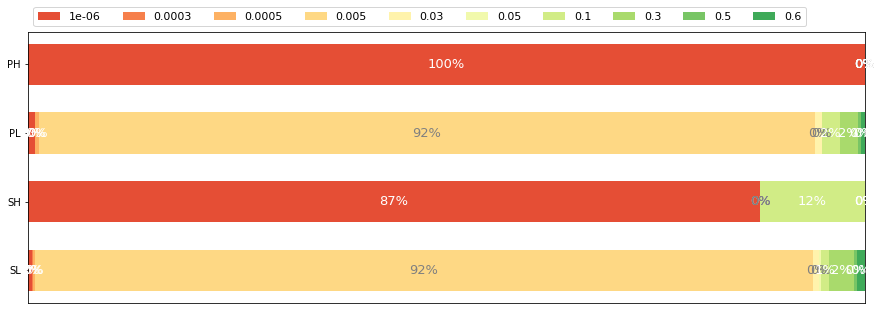

In [14]:
geo_prectage(rn_count, rn_count.columns)

In [9]:
slope_count = geo_table("Slope")
slope_count

Slope,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,13.0,14.0,15.0
type_place,,,,,,,,,,,,,,
PH,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PL,39.06,19.31,14.59,17.17,3.86,4.72,0.43,0.86,0.00,0.00,0.00,0.00,0.00,0.00
SH,93.75,0.00,6.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SL,34.54,17.02,20.43,18.92,4.39,2.13,1.31,0.62,0.39,0.07,0.07,0.03,0.03,0.03


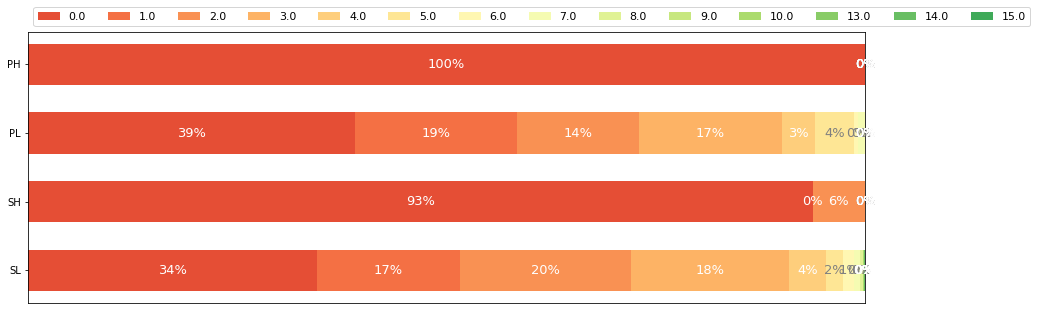

In [15]:
geo_prectage(slope_count, slope_count.columns)

In [11]:
aspect_count = geo_table("Aspect")
cols = [x for x in aspect_count.columns if x not in [-1.0, 0.0]]
aspect_count["others"] = aspect_count.apply(lambda x: sum(x[cols]), axis=1)
aspect_count

Aspect,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,334.0,335.0,336.0,338.0,339.0,342.0,346.0,347.0,350.0,others
type_place,,,,,,,,,,,,,,,,,,,,,
PH,30.00,70.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PL,29.18,1.72,0.00,0.43,0.00,0.43,0.43,0.86,0.43,0.43,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,69.23
SH,25.00,68.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6.25
SL,26.53,0.92,0.39,0.26,0.46,0.07,0.36,0.39,0.39,0.33,...,0.1,0.03,0.1,0.07,0.07,0.03,0.03,0.03,0.03,72.59


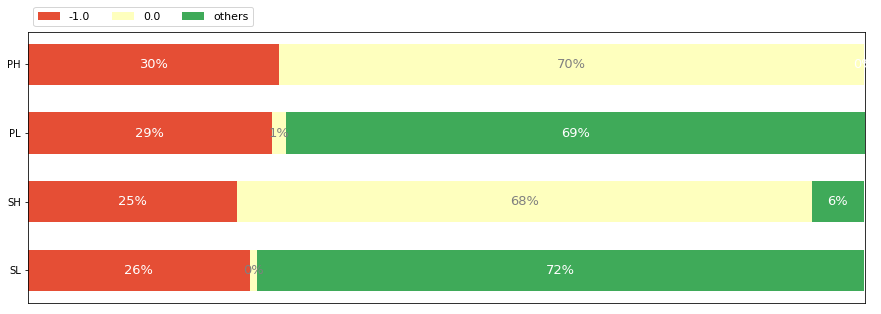

In [16]:
geo_prectage(aspect_count,[-1.0, 0.0, "others"])

# A simulation of wind speed interpolation with various roughness length

Wind Speed 10m: 5 m/s  
Roughness range: \[0.000001, 0.0003, 0.0005, 0.005, 0.03, 0.05, 0.1, 0.3, 0.5, 0.6\]  
Hub height range: \[0,100\] m

In [94]:
from features import pow_law

In [644]:
exp = lambda rn : 0.096 * np.log10(rn) + 0.016 * np.log10(rn) ** 2 + 0.24
pow_law = lambda v, z, z_hat, a : v * ( (z_hat/z) ** a)

In [645]:
get_ws_h_rn = lambda h, rn : round(pow_law(ws_ass10, 10, h, exp(rn)), 5)
get_ws_h_smrn = lambda h, rn : round(pow_law(ws_ass10, 10, h, rn), 5)

In [646]:
ws_ass10 = 6
rn_range = (0.001, 0.003, 0.005, 0.03, 0.05, 0.1, 0.3, 0.5, 0.6)
h_range = np.linspace(0.1,100,201)

In [647]:
ls = pd.DataFrame([], columns=h_range, index = rn_range)

In [648]:
for rn in rn_range:
    for h in h_range:
        ls.loc[rn][h] = get_ws_h_rn(h, rn) if rn >= 0.001 else get_ws_h_smrn(h, rn)

In [649]:
ls

,0.1000,0.5995,1.0990,1.5985,2.0980,2.5975,3.0970,3.5965,4.0960,4.5955,...,95.5045,96.0040,96.5035,97.0030,97.5025,98.0020,98.5015,99.0010,99.5005,100.0000
0.001,3.85613,4.57951,4.85386,5.03162,5.16469,5.27167,5.36144,5.43896,5.50729,5.56846,...,7.45133,7.45506,7.45877,7.46247,7.46615,7.46981,7.47346,7.47709,7.4807,7.4843
0.003,3.79199,4.53281,4.81498,4.99813,5.1354,5.24585,5.3386,5.41874,5.48941,5.55271,...,7.51282,7.51673,7.52062,7.52449,7.52834,7.53217,7.53599,7.53979,7.54357,7.54733
0.005,3.71978,4.47987,4.77079,4.96002,5.10203,5.21642,5.31254,5.39565,5.469,5.53472,...,7.58393,7.58804,7.59213,7.5962,7.60025,7.60428,7.6083,7.61229,7.61627,7.62023
0.030,3.28345,4.15099,4.49374,4.71964,4.89067,5.02934,5.14648,5.24821,5.33833,5.41935,...,8.06207,8.06757,8.07306,8.07851,8.08395,8.08936,8.09474,8.1001,8.10544,8.11076
0.050,3.11733,4.02136,4.38325,4.62309,4.80533,4.95348,5.07892,5.18805,5.28488,5.37205,...,8.2698,8.27593,8.28204,8.28813,8.29418,8.30021,8.30621,8.31219,8.31814,8.32406
0.100,2.87178,3.8247,4.21416,4.47451,4.67348,4.83593,4.97395,5.09439,5.2015,5.29815,...,8.60905,8.61624,8.62339,8.63052,8.63761,8.64468,8.65171,8.65872,8.66569,8.67264
0.300,2.45355,3.47396,3.90782,4.20271,4.43058,4.61818,4.77863,4.91941,5.04522,5.15922,...,9.2993,9.30873,9.31811,9.32746,9.33676,9.34603,9.35526,9.36446,9.37361,9.38273
0.500,2.25449,3.2989,3.75244,4.06349,4.30527,4.5052,4.67682,4.82784,4.96316,5.08604,...,9.69296,9.70371,9.71442,9.72509,9.73571,9.74629,9.75683,9.76732,9.77777,9.78819
0.600,2.18359,3.2351,3.69539,4.01212,4.25887,4.46326,4.63893,4.79371,4.93251,5.05867,...,9.84593,9.85721,9.86844,9.87963,9.89077,9.90187,9.91293,9.92394,9.93491,9.94583


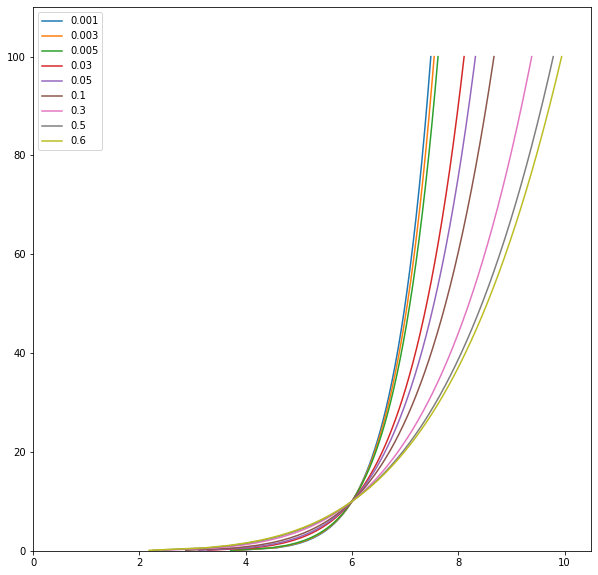

In [650]:
# from scipy.interpolate import make_interp_spline

plt.figure(figsize=(10, 10))
plt.xlim(0, 10.5)
plt.ylim(0, 110)
x_new = np.linspace(0,11,100)
for rn, ws in ls.iterrows():
    plt.plot(ws, h_range, label='{:f}'.format(rn).rstrip('0'))
plt.legend()


In [627]:
ws10 = pd.read_parquet(constant.ws10_path)
ws100 = pd.read_parquet(constant.ws100_path)

In [585]:
windmill_SL

,GSRN,Turbine_type,Parent_GSRN,BBR_municipal,Placement,UTM_x,UTM_y,Capacity_kw,Rotor_diameter,Navhub_height,Elevation,Slope,Aspect,grid,Roughness,max_VAERDI
0,570715000000146398,W,NaN,760,LAND,460170.090,6210725.390,3075.0,112.0,94.0,2.000,0.0,-1.0,1322,0.005,800.0
1,570715000000046605,W,NaN,550,LAND,491159.150,6103135.830,600.0,44.0,46.0,7.000,1.0,77.0,1149,0.005,100.0
2,570715000000026713,W,NaN,630,LAND,528151.659,6185719.158,660.0,47.0,45.0,97.611,3.0,135.0,1112,0.005,200.0
3,570715000000049514,W,NaN,510,LAND,529291.497,6117041.389,1300.0,60.0,46.0,46.000,3.0,146.0,1066,0.005,300.0
4,570715000000056178,W,NaN,561,LAND,474300.000,6144750.000,2000.0,80.0,60.0,2.750,2.0,267.0,1235,0.005,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,570715000000010576,W,NaN,820,LAND,524247.840,6282363.530,660.0,47.0,50.0,29.000,0.0,-1.0,1202,0.005,200.0
3573,570715000000009808,W,NaN,820,LAND,529101.410,6293551.640,600.0,43.0,50.0,24.664,4.0,153.0,1202,0.005,100.0
3574,570715000001465047,W,NaN,400,LAND,866970.000,6127812.000,2300.0,93.0,80.0,69.000,0.0,-1.0,274,0.005,2000.0
3575,570715000001465054,W,NaN,400,LAND,866800.000,6127998.000,2300.0,93.0,80.0,69.000,2.0,204.0,274,0.005,2000.0


In [586]:
tmp = ws10[["1202"]]
tmp["ws100"] = ws100["1202"]
tmp

,1202,ws100
0,1.5,3.6
1,2.1,4.9
2,1.7,4.3
3,2.3,4.9
4,2.4,4.6
...,...,...
16538,9.2,14.3
16539,8.4,13.2
16540,6.4,10.5
16541,4.3,8.5
